<a href="https://colab.research.google.com/github/J-o-y-y/data_visualization_2023_sep./blob/main/20230918_%EB%84%A4%EC%9D%B4%EB%B2%84%EB%89%B4%EC%8A%A4_%ED%81%AC%EB%A1%A4%EB%A7%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#[네이버뉴스 크롤링 데이터수집,시각화 프로젝트]

### 1. 2023년 8월 한달동안의 연합뉴스 크롤링

### 2. 크롤링 항목은 날짜, 타이틀, 기사본문, 기사반응, 카테고리

### 3. 기사내용 전처리 진행

### 4. 기사는 news.csv 파일로 저장

In [1]:
pip install beautifulsoup4 requests matplotlib

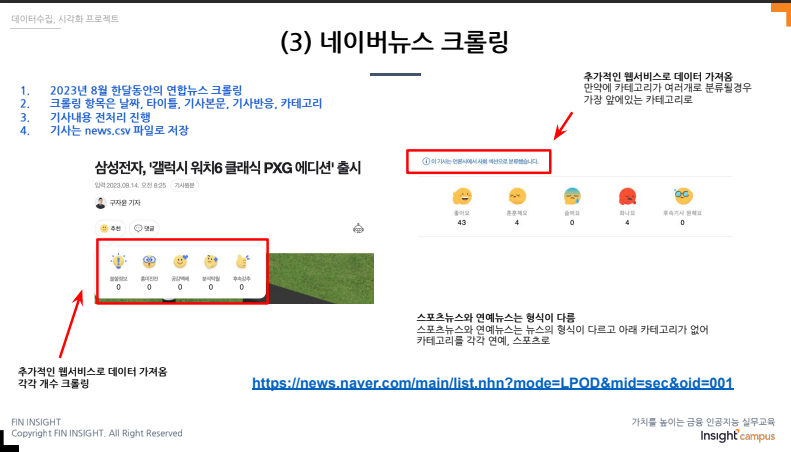

In [7]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

URL = 'https://news.naver.com/main/list.naver?mode=LPOD&mid=sec&oid=001'

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/116.0.0.0 Safari/537.36"
}


In [17]:
date_range = pd.date_range(start='2023-08-01', end='2023-08-31')

for date in date_range:
    date_str = date.strftime("%Y%m%d")
    url = f"{URL}&date={date_str}"

    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')

    articles = soup.find_all('li', {'class': 'cluster_item'})

    for article in articles:
        article_date = article.find('span', {'class': 'lede'}).text.strip()  # 날짜
        article_title = article.find('a', {'class': 'nclicks(cnt_flashart)'}).text.strip()  # 타이틀
        article_link = article.find('a', {'class': 'nclicks(cnt_flashart)'})['href']  # 기사 링크
        article_category = article.find('em').text.strip()  # 카테고리


        article_response = requests.get(article_link, headers=headers)
        article_soup = BeautifulSoup(article_response.text, 'html.parser')
        article_content = article_soup.find('div', {'id': 'articleBodyContents'})

        if article_content:
            article_content = article_content.text.strip()
        else:
            article_content = ''


        news_data.append([article_date, article_title, article_content, '', article_category])


df = pd.DataFrame(news_data, columns=['날짜', '타이틀', '기사본문', '기사반응', '카테고리'])


df.to_csv('news.csv', index=False, encoding='utf-8')

print('완료')


크롤링 및 데이터 수집이 완료되었습니다.
